# Tipping problem (Mamdani)
Multiple Input:
* Food quality
* Service

Single Output:
* Tip (percentage)

In [2]:
#!pip install -U scikit-fuzzy
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import skfuzzy as fuzz # Generar MFs
from skfuzzy import control as ctrl # inferencia

ModuleNotFoundError: No module named 'imp'

In [1]:


# Antecedentes
quality = ctrl.Antecedent(np.arange(0, 11, 1), 'quality')
service = ctrl.Antecedent(np.arange(0, 11, 1), 'service')

# Consequent
tip = ctrl.Consequent(np.arange(0, 26, 1), 'tip')

# genera automaticamente 3 MFs para cada antecedente
quality.automf(3)
service.automf(3)

# Customised Triangular MFs, 0 - 25
tip['low'] = fuzz.trimf(tip.universe, [0, 0, 12])
tip['medium'] = fuzz.trimf(tip.universe, [5, 13, 20])
tip['high'] = fuzz.trimf(tip.universe, [15, 25, 25])

c:\Users\tonys\AppData\Local\Programs\Python\Python312\Lib\site-packages\skfuzzy\__init__.py:91: SyntaxWarning: invalid escape sequence '\.'
  args.extend(['--with-doctest', '--ignore-files=^\.',
c:\Users\tonys\AppData\Local\Programs\Python\Python312\Lib\site-packages\skfuzzy\__init__.py:92: SyntaxWarning: invalid escape sequence '\.'
  '--ignore-files=^setup\.py$$', '--ignore-files=test'])


ModuleNotFoundError: No module named 'imp'

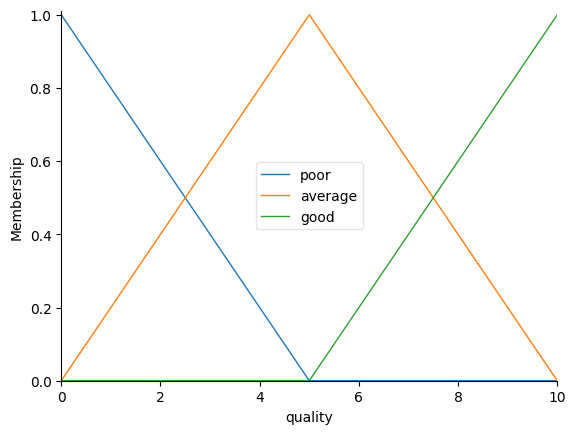

In [23]:
# Visualización de antecedentes
quality.view()

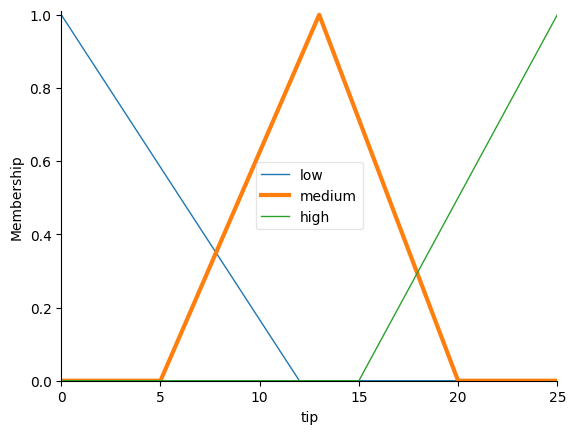

In [24]:
tip['medium'].view()

# Fuzzy Rules
1. IF the food is poor AND the service is poor, THEN the tip will be low
2. IF the food is average OR the service is average, THEN the tip will be medium
3. IF the food is good AND the service is good, THEN the tip will be high

* OR: |
* AND: &
* NOT: ~

In [25]:
rule1 = ctrl.Rule(quality['poor'] & service['poor'], tip['low'])
rule2 = ctrl.Rule(quality['average'] | service['average'], tip['medium'])
rule3 = ctrl.Rule(quality['good'] & service['good'], tip['high'])

In [26]:
# Creamos el bloque de inferencia
tipping_inference = ctrl.ControlSystem([rule1, rule2, rule3])

# Nuestro FIS: Fuzzy Inference System
tipping_fis = ctrl.ControlSystemSimulation(tipping_inference)

Ahora pongamoslo a prueba...

In [27]:
tipping_fis.input['quality'] = 6.5
tipping_fis.input['service'] = 9

# Calcular
tipping_fis.compute()
print(tipping_fis.output['tip'])

14.59971086327963


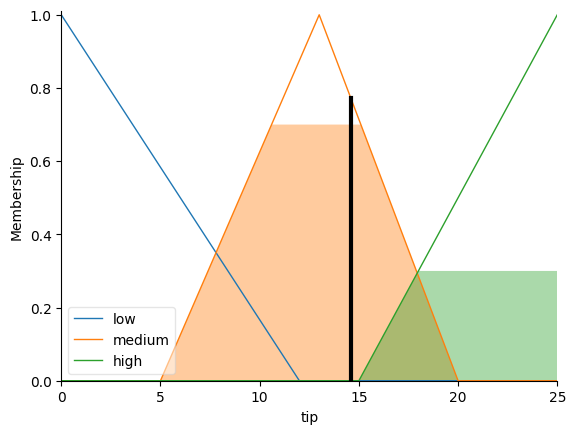

In [28]:
# Visualizar salida
tip.view(sim=tipping_fis)

In [29]:
# proporcionar informacion usando un diccionario
tipping_fis.inputs({'quality': 3, 'service': 2})
tipping_fis.compute()
tipping_fis.output['tip']

9.895846168206855

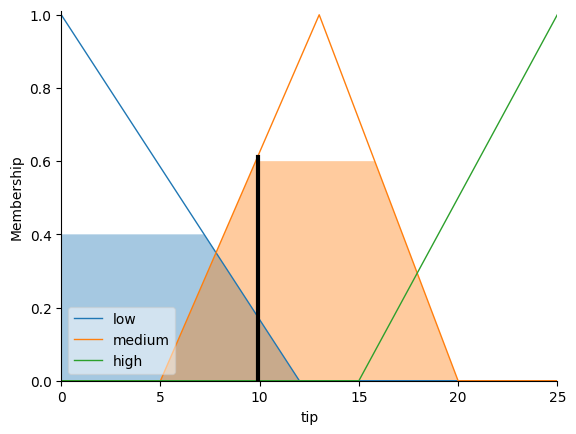

In [30]:
tip.view(sim=tipping_fis)